In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#generic explicit RK interface

#Butcher class object:

class Butcher:
    def __init__(self,A=np.array([0]),b=np.array([1]),c=np.array([0])): # constructor, butcher coefficients, default = FE.
        self.A=A  #BUTCHER TABLE ENTRIES
        self.b=b
        self.c=c

        #GENERIC RK STEP
    def step(self,state,func,t,dt=.1):  #state=solution vector, func=rhs funciton
        stages=np.zeros((self.b.size,state.size))
        stages[0]=func(state,t)
        #compute stages
        for stage_count in range(1,self.b.size):
            temp=np.copy(state)
            for loop in range(stage_count):
                temp+=dt*self.A[stage_count,loop]*stages[loop]
            stages[stage_count]=func(temp,t+dt*self.c[stage_count])
        #sum stages
        new_state=state+dt*np.dot(self.b,stages)
        return new_state
      

We test RK1(FE) and RK2(Heun) on a simple linear problem involving 
exponential growth.

$$
y^\prime =Ay, \quad 
A= \begin{pmatrix} 2 & -1 \\ -1 & 2 \end{pmatrix}, \quad y(t=0)=(1 \quad  0)^\top
$$

In [22]:
init=np.array([1.0,0])
dt=.1

def rhs(x,t):
    RHS_MAT=np.array([[2,-1],[-1,2]])
    return np.dot(RHS_MAT,x)

#test
print(rhs(init,0))

[-2.  1.]


In [39]:
#initialize RK0 
rk0=Butcher()
#print(type(rk0.A))
print((rk0.A).size)
heun=Butcher(A=np.array([[0,0],[1,0]]),b=np.array([.5,.5]), c=np.array([0,1]))
mid=Butcher(A=np.array([[0,0],[.5,0]]),b=np.array([0,1]), c=np.array([0,.5]))
state=np.copy(init)
state_heun=np.copy(init)
state_mid=np.copy(init)
#take 100 timesteps with delta t = .1
t=0

1


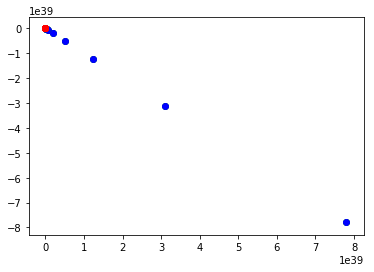

In [40]:
#%debug
plt.figure()
while t<10:
    state=rk0.step(state,rhs,t,dt=1)
    state_heun=heun.step(state_heun,rhs,t,dt=1)
    state_mid=mid.step(state_mid,rhs,t,dt=1)
    plt.scatter(state[0],state[1],c='r')
    plt.scatter(state_heun[0],state_heun[1],c='g')
    plt.scatter(state_mid[0],state_mid[1],c='b')
    t+=dt
plt.show()

In [41]:
   
    
print(state_heun)
print(state_mid)
print(state)
    

[  7.77876910e+39  -7.77876910e+39]
[  7.77876910e+39  -7.77876910e+39]
[ -1.26765060e+30   1.26765060e+30]


## Harmonic Oscillator (Linear)

The governing equation is $ y^{\prime\prime}=-ky$, $y(0)$,$y^\prime(0)$ given.  (Initial position and velocity at time=0).  

We can always transform this equation into a first order system by using the reduction of order technique, namely letting $y_1=y$, and $y_2=y^\prime$.  We then get the system
$$
y_1^\prime=y_2, \quad y_2^\prime=-ky_1, \quad y_1(0), \quad y_2(0) \quad given, \quad k>0
$$
or in vector form
$$
Y^\prime = AY, Y(0) \quad given, \quad  A=\begin{bmatrix} 0 & 1 \\ -k & 0 \end{bmatrix}
$$
If the initial velocity is zero and the initial displacement is one,
the particular solution is $y=y_2=cos\sqrt{k}x$

In [ ]:
from numpy import *
from pylab import *

def trapstep(t,x,h):
	#one step of the Trapezoid Method
	z1 = ydot(t,x)
	g = x + h*z1
	z2 = ydot(t+h,g)
	return x + h*(z1+z2)/2.

def leapfrog(t,x,h):
    #one step of fixed step leapfrog.
    z1 = ydot(t,x) #initial forcing
    x[0]+= x[1]*h + .5*z1[1]*h**2
    z2 = ydot(t+h,x)
    x[1]+= .5*(z1[1]+z2[1])*h
    return x

def imp_euler(t,x,h,debug=False):
    #one step of implicit euler
    guess=euler(t,x,h) #do one step of exp euler for initial guess
    residual=guess-x-h*ydot(t+h,guess)
    while linalg.norm(residual) > 1E-12:
        if debug:
            print(t,residual)
        step=linalg.solve(np.eye(2)-h*jac_ydot(t+h,guess),-residual)
        guess+=step
        residual=guess-x-h*ydot(t+h,guess)
    return guess
        
        


def euler(t,x,h):
    #one step of the forward Euler method
    z1 = ydot(t,x)
    return x + h*z1

def rk4step(t,w,h):
	#one step of the Runge-Kutta order 4 method
	s1 = ydot(t,w)
	s2 = ydot(t+h/2,w+h*s1/2.)
	s3 = ydot(t+h/2,w+h*s2/2.)
	s4 = ydot(t+h,  w+h*s3)
	return w + h*(s1+2*s2+2*s3+s4)/6.




In [ ]:
def ivp(ab,ic,n,time_int=euler):
    h = float(ab[1]-ab[0])/n	# plot n points in total
    y = zeros((n+1,2)); 
    t = empty(n+1)					
    y[0,:] = ic;
    t[0] = ab[0]	# enter initial conds in y
    for k in range(n):
        t[k+1] = t[k] + h
        y[k+1,:] = time_int( t[k],y[k,:], h )
    return t,y

In [ ]:
def jac_ydot(t,x,k=10):
    return array([[0,1],[-k,0]])

#steps,state=ivp([0,3000],[0,1],300000,leapfrog)
#plt.plot(steps,state[:,1],label='FE')
#plt.plot(steps,cos(10**.5*steps)-state[:,1])
#plt.show()
#plt.figure()
steps,state=ivp([0,300000],[0,1],3000000,rk4step)
#plt.plot(steps,state[:,1],label='FE')

In [ ]:
#plt.figure(figure_size(16,8))
plt.plot(steps[-10000::100],cos(10**.5*steps[-10000::100])-state[-10000::100,1])
plt.show()

In [ ]:
plt.plot(steps[0::10],1/np.sqrt(10)*sin(10**.5*steps[0::10])-state[0::10,0])
plt.show()

In [ ]:
def ydot(t,x,k=10):
    return array([x[1],-k*x[0]])


steps,state=ivp([0,30],[0,1],np.int(30*10),imp_euler)
plt.plot(steps,state[:,1],label='FE')
plt.plot(steps,cos(10**.5*steps))
plt.show()

plt.figure()
plt.plot(steps,state[:,0])
plt.plot(steps,1/np.sqrt(10)*sin(10**.5*steps))
plt.show()





In [ ]:
tmax=100
steps,state=ivp([0,tmax],[0,1],tmax*1000,time_int=rk4step)
#plt.plot(steps,state[:,1])
plt.plot(steps,cos(10**.5*steps)-state[:,1])
#plt.plot(steps,state[:,0])
#plt.plot(steps,cos(steps))
plt.show()

## Implicit Euler

Involves solving a system of equations at each timestep.  It is based upon
solving 
$$
y_{n+1} = y_n + h f(t_{n+1},y_{n+1})
$$ 
so $y_{n+1}$ is **implicitly** defined via a system of equations.  For a 
linear system, we get a matrix problem.  For a non-linear system, we get a
system we have to solve using something like the multivariate Newton's method.  The equation for the Newton step is:
$$
(I - h Df(t_{n+1},\tilde{y}_{i})\delta_i = y_n + h f(t_{n+1},\tilde{y}_{i})-\tilde{y}_{i},
$$
where $\tilde{y}_i$ is the current Newton iterate, $\tilde{y}_0=y_n$, and
$Df$ is the Jacobian of f.

The converged Newton iterate becomes the new $y_{n+1}$.

In [ ]:
steps,state=ivp([0,30],[0,1],100,rk4step)
plt.plot(steps,state[:,1],label='RK4')
plt.plot(steps,cos(10**.5*steps))
plt.show()

## To Do:  
Find a timestep for Euler that gives "stable" results.
Produce a plot for RK4.  What timestep(s) gives "good" results?


## Nonlinear ODE: The Pendulum

$$
\theta_{tt}=-d\theta_t -\frac{g}{L}\sin(\theta)
$$

Here $\theta$ represents the angle with to the direction of the gravitational force.  Two equilibrium solution corresponds to the 
pendulum aligned with gravity with **no** angular velcity.  

An initial condition of $\theta(0)=\pi/2$ and $\theta_t(0)=0$ would correspond to the pendulum being held at a 90 degree angle with the ground, and then released.

In [ ]:
def ydot(t,x,d=0,g=9.81,length=1):
    #g = 9.81; length = 1
    return array( [x[1], -(g/length)*sin(x[0])-d*x[1]] )

#def ydot(t,x):
#    return array([-x[0],-x[1]])

def jac_ydot(t,x,d=0,g=9.81,length=1):
    return array([[0, 1],[-g/length*cos(x[0]),-d]])

#def jac_ydot(t,x):
#    return -eye(2)

steps,state=ivp([0,10],[pi/2,0],100,trapstep)
plot(steps,state[:,0])
plt.show()

## To Do:  
Without damping, for what values of $\Delta t=h$ does forward euler 
give "physical solutions".

## Damped Linear Oscillator and Resonance

We add a damping force (often the natural damping of a structure, proportionally to the velocity.

$$
y_{tt}= -dy_{t}-\frac{K}{m}y
$$

The damping adds a strong "stiffness" limit to the system that creates a small timestep restriction even when the solution is slowly changing.

In [ ]:
def ydot(t,y,d=20,K=1):
    #d=0
    return array([y[1],-K*y[0]-d*y[1]])

def jac_ydot(t,y,d=20,K=1):
    return array([[0,1],[-K,-d]])

steps,state=ivp([0,10],[1,0],90,time_int=euler)

plot(steps,state)
plt.show()

In [ ]:
steps,state=ivp([0,10],[1,0],50,time_int=euler)
plot(steps,state)
plt.show()

    

In [ ]:
steps,state=ivp([0,10],[1,0],10,time_int=imp_euler)

plot(steps,state)
plt.show()

## To Do:  
Determine what timestep causes the solution to go unstable for the
trapezoidal rule?  RK4?


In [ ]:
steps,state=ivp([0,10],[1,0],100,time_int=rk4step)
plot(steps,state)
plt.show()

## What if we added a forcing term?

Something like $W_0 \cos(\alpha t)$? (and turned off damping?)

In [ ]:
def ydot(t,y,d=20,K=1):
    d=1
    w_0=.1
    alpha=2
    shift=0
    return array([y[1],-K*y[0]-d*y[1]+w_0*cos(alpha*(t-shift))])

steps,state=ivp([0,100],[1,0],10000,time_int=rk4step)

plot(steps,state[:,0])
plt.show()

## What happens when $\alpha=\sqrt{K/m}$?

In [ ]:
def ydot(t,y,d=20,K=1):
    d=1
    w_0=.1
    alpha=1
    return array([y[1],-K*y[0]-d*y[1]+w_0*cos(alpha*t)])

steps,state2=ivp([0,100],[1,0],10000,time_int=rk4step)
plot(steps,state2[:,0])

plot(steps,state[:,0])
plt.show()

## Tacoma Narrows Bridge

Model: The simple linear model is two harmonic oscillators(springs), connected by a rigid rod that represents the road.  You could write the
system in terms of the velocities and displacements of the two springs,
or you can write it in terms of the velocity and displacement of the midpoint and the angle and change in angle at that midpoint.  

$$
\begin{multline*}
y^{\prime\prime} = -y^\prime - \frac{K}{m}\left(f(y-L\sin \theta) -f(y+L\sin \theta) \right) \\
\theta^{\prime\prime}= -\theta^\prime - \frac{3\cos\theta}{L}\frac{K}{m}\left( f(y-L\sin\theta) - f(y+L\sin\theta) \right)
\end{multline*}
$$
where $K$ is the identical spring constant, $L$ is the length of the 
road, and $m$ is the identical mass of the two springs.

$f(Y)$ represents the spring model.  
* We will consider a simple linear model where $f(Y)=Y$
* We will also consider a nonlinear model where $f(Y)=(a)^{-1}(e^{aY}-1)$, and $a$ is a parameter.





In [ ]:
# Program 6.6 Animation program for bridge using IVP solver
# Translated to Python by JR 2/17/2012. Update for 2e 2/24/12.
# Inputs: inter = time interval inter, 
#   ic = [y[0,0] y[0,1] y[0,2] y[0,3]],
#   number of steps n, p = steps per point plottedZZ
# Calls a one-step method such as trapstep.m
# Example usage: tacoma([0,1000],[0,0,0.001,0],25000,3)

from numpy import *
from pylab import *
#from time  import sleep
from matplotlib import animation, rc
from IPython.display import HTML


In [ ]:
def tacoma(inter,ic,n,time_int=trapstep):
    [a,b] = inter; h = float(b-a)/n 	# plot n points
    y = zeros((n,4)); t = zeros(n)
    y[0,:] = ic							# enter initial conds in y
    t[0] = a

    for i in range(n-1):
        t[i+1] =  t[i]+h; 
        y[i+1,:] = time_int(t[i],y[i,:],h); 
    return t,y

def ydot(t,y):
    leng = 6;  a = 0.2;  W = 80;  omega = 2*pi*38/60.
    K=1000
    M=2500
    Koverm=K/M
    #Koverm=omega**2
    linear = False #toggle to switch model
    if linear:
        F1 = y[0]-leng*sin(y[2])
        F2 = y[0]+leng*sin(y[2])
    else:
        F1 = exp(a*(y[0]-leng*sin(y[2])))-1
        F1 /= a
        F2 = exp(a*(y[0]+leng*sin(y[2])))-1
        F2 /= a
    ydot = empty(4)
    ydot[0] = y[1]
    ydot[1] = -0.01*y[1]-Koverm*(F1+F2)+0.2*W*sin(omega*t)
    ydot[2] = y[3]
    ydot[3] = -0.01*y[3]+3*Koverm*cos(y[2])*(F1-F2)/leng
    return ydot

t,y=tacoma([0,1000],[0,0,0.001,0],25000,time_int=rk4step)


In [ ]:
Rp=9
length=6
fig=figure()
plot([-Rp,Rp,Rp],[-Rp,-Rp,Rp],'w')
c = length*cos(y[0,2]); s = length*sin(y[0,2])
road,   = plot([-c, c],[-s-y[0,0], s-y[0,0]],linewidth=5) 
lcable, = plot([-c,-c],[-s-y[0,0],8]) 
rcable, = plot([ c, c],[ s-y[0,0],8])
def plot_tac(i):
    length=6
    c = length*cos(y[i,2]); s = length*sin(y[i,2])
    road.set_data([-c, c],[-s-y[i,0], s-y[i,0]]) 
    lcable.set_data([-c,-c],[-s-y[i,0],8]) 
    rcable.set_data([ c, c],[ s-y[i,0],8])
    return road,lcable,rcable
    
ani = animation.FuncAnimation(fig, plot_tac, arange(0,25000,100),blit=True)

In [ ]:
HTML(ani.to_html5_video())


In [ ]:
def plot_vars(t,y,start=0,end=None):
    fig2,ax=plt.subplots(4)    
    for i in range(4):
        ax[i].plot(t[start:end],y[start:end,i])
    subplots_adjust(hspace=.5)
    fig2.set_size_inches(20,16)
    plt.show(fig2)
    #window=t[end-1]-t[start]
    #xticks(arange(t[start],t[end],window/5))
plot_vars(t,y)

In [ ]:
t,y=tacoma([0,1000],[0,0,0.001,0],25000,time_int=rk4step)

In [ ]:
plot_vars(t,y)


In [ ]:
print(2*pi*38/60)

In [ ]:
plot_vars(t,y,0,100)

## To Do:

Experiment with  the minimum wind speed s.t. an  initial disturbancein $\theta$ is damped out over time for the nonlinear model.